In [1]:
import pandas as pd
pd.__version__

'1.5.3'

In [2]:
import os
import numpy as np
from pathlib import Path

filepath = Path(os.environ["HOME"]) / "Downloads" / 'cic2017_dataset/MachineLearningCSV/MachineLearningCVE' / 'combined_without_monday.csv'
df = pd.read_csv(filepath, compression=None, encoding='utf-8')


In [3]:
columns_to_remove = ['Fwd Header Length.1','Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'CWE Flag Count', 'Subflow Fwd Packets',
                     'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes']
df.rename(columns=lambda s: s.strip(), inplace=True)
df.drop(columns=columns_to_remove, inplace=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(how="any", inplace=True)

df.describe()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.298395e+06,2.298395e+06,2.298395e+06,2.298395e+06,2.298395e+06,2.298395e+06,2.298395e+06,2.298395e+06,2.298395e+06,2.298395e+06,...,2.298395e+06,2.298395e+06,2.298395e+06,2.298395e+06,2.298395e+06,2.298395e+06,2.298395e+06,2.298395e+06,2.298395e+06,2.298395e+06
mean,7.469650e+03,1.581493e+07,9.131997e+00,1.014543e+01,5.537696e+02,1.577953e+04,2.116652e+02,1.836985e+01,5.997880e+01,7.162319e+01,...,4.963975e+00,-2.543362e+03,8.466168e+04,4.069685e+04,1.551410e+05,6.169876e+04,9.443533e+06,5.738682e+05,9.875060e+06,8.999578e+06
std,1.742719e+04,3.462013e+07,7.131355e+02,9.527779e+02,1.067983e+04,2.158109e+06,7.661034e+02,6.463674e+01,2.016924e+02,3.039526e+02,...,5.758293e+02,1.174499e+06,6.622357e+05,3.927132e+05,1.025705e+06,5.938135e+05,2.534069e+07,4.998290e+06,2.612314e+07,2.507376e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.480000e+02,1.000000e+00,1.000000e+00,6.000000e+00,2.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.135000e+04,2.000000e+00,2.000000e+00,6.000000e+01,1.200000e+02,3.600000e+01,2.000000e+00,3.300000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,4.620721e+06,5.000000e+00,4.000000e+00,1.880000e+02,5.680000e+02,8.100000e+01,3.500000e+01,4.937500e+01,2.327660e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553300e+04,1.200000e+08,2.079640e+05,2.846020e+05,1.290000e+07,6.270000e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.049469e+03,...,1.986360e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [4]:
attack_counts = df['Label'].value_counts().rename(lambda s: s.replace("Web Attack � ", ""))

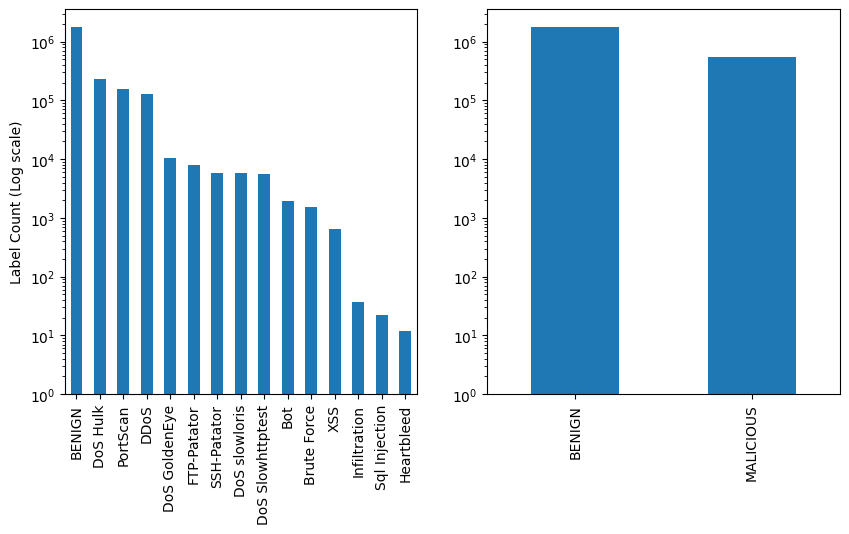

In [21]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

attack_counts.plot.bar(ax=ax1, log=True,ylabel='Label Count (Log scale)')

attack_malicious_benign = df['Label'].copy().apply(lambda s: 'BENIGN' if s == 'BENIGN' else 'MALICIOUS').value_counts()
attack_malicious_benign.plot.bar(ax=ax2, log=True)

plt.savefig("dataset_label_distribution.svg", format="svg", bbox_inches='tight')
plt.show()


In [22]:
df.shape


(2298395, 71)